In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import LogLocator
import math

In [2]:
df = pd.read_csv("./reports/multiplication_times_binary.csv")
df.head()

,Log Vector Length,Naive Time (ms),RSR Time (ms),RSRPP Time (ms)
0,11,56,8,6
1,12,244,27,24
2,13,1349,104,96
3,14,6668,391,323
4,15,30529,1412,1278


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


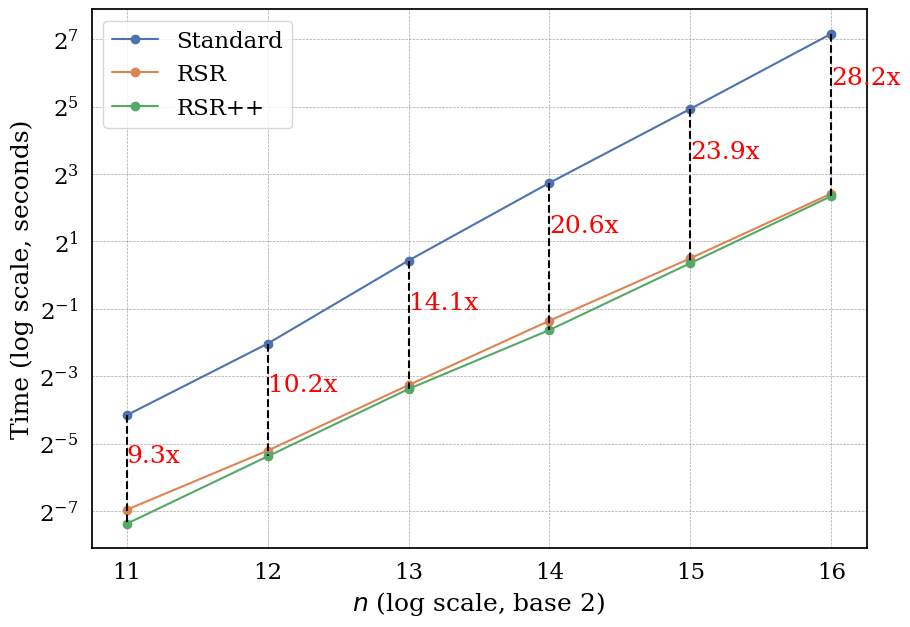

In [3]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

plt.rcParams['font.family'] = 'serif'  # Set font to Times New Roman
plt.rcParams['text.color'] = 'black'  # Set text color to black
plt.rcParams['axes.labelcolor'] = 'black'  # Set axis labels color to black
plt.rcParams['xtick.color'] = 'black'  # Set x-tick color to black
plt.rcParams['ytick.color'] = 'black'  # Set y-tick color to black
plt.rcParams['axes.edgecolor'] = 'black'  # Set axes edge color to black
plt.rcParams['axes.titleweight'] = 'bold'  # Bold title for emphasis

log_vector_lengths = df['Log Vector Length']  # Length of each vector
naive_times = df['Naive Time (ms)'] / 1000 # Milliseconds
rsr_times = df['RSR Time (ms)'] / 1000
rsrpp_times = df['RSRPP Time (ms)'] / 1000

# Create the plot with improved aesthetics
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(10, 7))


# Plot times for NaiveMultiplier and RSRMultiplier
plt.plot(log_vector_lengths, naive_times, label='Standard', marker='o')
plt.plot(log_vector_lengths, rsr_times, label='RSR', marker='o')
plt.plot(log_vector_lengths, rsrpp_times, label='RSR++', marker='o')


# Draw lines connecting Naive and RSR times for each vector length to show speedup visually
for i in range(len(log_vector_lengths)):
    plt.plot([log_vector_lengths[i], log_vector_lengths[i]], [naive_times[i], rsrpp_times[i]], 
            color='black', linestyle='--')

# Label the points with the speedup factor
for i, length in enumerate(log_vector_lengths):
    plt.text(length, (naive_times[i] + rsrpp_times[i]) / 2, f"{naive_times[i]/rsrpp_times[i]:.1f}x",
            ha='left', va="top", color='red')

# Configure the plot aesthetics
# plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.xlabel('$n$ (log scale, base 2)')
plt.ylabel('Time (log scale, seconds)')
# plt.title('Comparison of Naive and RSR Multiplication Methods', fontsize=18, pad=20)
plt.legend()

# Configure x-axis ticks for log base 2 and a clean grid
# plt.gca().xaxis.set_major_locator(LogLocator(base=2))
plt.grid(True, which="both", ls="--", lw=0.5, color='gray', alpha=0.7)

# Save as EPS and display
# plt.savefig(f"native_binary_times.eps", format='eps', bbox_inches='tight')
plt.show()

/home/mohsen/venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/mohsen/venv/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


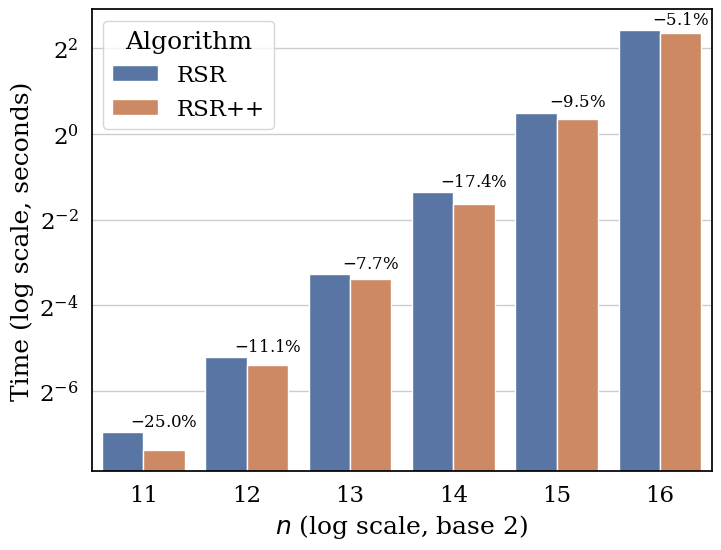

In [64]:
# Data preparation
# positions = [11, 12, 13, 14, 15, 16]
# values1 = [1, 2, 3, 4, 5, 6]
# values2 = [1.2, 2.2, 3.2, 4.2, 5.2, 6.2]

log_vector_lengths = df['Log Vector Length'].tolist()  # Length of each vector
rsr_times = (df['RSR Time (ms)'] / 1000).tolist()
rsrpp_times = (df['RSRPP Time (ms)'] / 1000).tolist()

improvements = [100 * (rsr_times[i] - rsrpp_times[i]) / rsr_times[i] for i in range(len(log_vector_lengths))]

data = pd.DataFrame({
    '$n$ (log scale, base 2)': log_vector_lengths * 2,
    'Time (log scale, seconds)': rsr_times + rsrpp_times,
    'Algorithm': ['RSR'] * 6 + ['RSR++'] * 6
})

# Plotting
plt.figure(figsize=(8, 6))
plt.yscale("log", base=2)
ax = sns.barplot(data=data, x='$n$ (log scale, base 2)', y='Time (log scale, seconds)', hue='Algorithm', dodge=True)
# plt.title("Bar Chart with Two Sets of Bars at Each Position")

bar_width = 0.2  # approximate width for alignment adjustment
for i, (pos, rel_imp) in enumerate(zip(log_vector_lengths, improvements)):
    # Calculate positions for the label to appear centered above each pair of bars
    x_pos = i + bar_width  # centering above both bars at each position
    y_pos = 1.1 * max(rsr_times[i], rsrpp_times[i])  # slightly above the taller bar
    ax.text(x=x_pos, y=y_pos, s=f"$-${rel_imp:.1f}%", ha='center', color='black', fontsize=12)

# plt.savefig(f"native_binary_times_rsr_rsrpp.eps", format='eps', bbox_inches='tight')
plt.show()